# NUMPY APLLICATION 

### OBJECTIVE

Use Numpy for modelling

#### Task
    

Implement a Linear Regression model using numpy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets


Linear Regregression has a general formula;
$y = mx+ b$

In this case:
$y = wx + b$

Linear Regression is used to:
1. Predict continuous values.
2. Find linear relationship between given variables and the target column.


$y$ - Target
$w$ - Weights
$x$ - features
$b$ - bias

# Gradient Descent;
We adjust weights and bias to reduce the error function. The values that yield the least errors will be used.

In [11]:
class LinearRegression:

    def __init__(self, ls=0.001, n_iters=1000):
        self.ls = ls
        self.n_iters = n_iters
        self.weights = None #we start with 0 weights
        self.bias = None # we also start with zero bias
    #The fit function fits our model in the train and test set
    #In this function we will define our loss as well as update our gradients. 
    def fit(self, X, y):
        #passing initial parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features) #starting with weights of zeros of the size four features
        self.bias = 0

        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights)+self.bias #y_pred = mx+b
            #calculating the derivatives
            dw = (1/n_samples) * np.dot(X.T, (y_predicted-y)) #multiplying by the transpose of x to find derivative of the weight
            db = (1/n_samples) * np.sum(y_predicted-y) #derivative of the bias

            #updating the weights
            self.weights -= self.ls*dw
            self.bias -= self.ls*db
            
            #essentially the above is the gradient descent

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

$y = wx + b$

In [3]:
class LinearRegression:
    
    def _init_(self, ls=0.01, n_iters= 1000):
        self.ls=ls
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for n in self.n_iters:
            y_predicted=np.dot(X, self.weights) + self.bias
            #we now obtain the derivatives of weights and bias
            dw = (1/n_samples)* np.dot(X.T, (y_predicted - y))
            db = (1/n_samples)* np.sum(y_predicted - y)
            
            #updating the weights in each iterative
            self.weights = dw
            self.bias = db
            
    def predict(self, X):
        y_predicted = np.dot(X, self.weights)+ self.bias
        return y_predicted
        
        

We then generate a dataset with a linear regression problem and split it into train and test datasets.

In [12]:
X,y = datasets.make_regression(n_samples= 1000, n_features= 1, noise = 20, random_state= 4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Applying our LinearRegression to the generated dataset.

In [10]:
Regressor= LinearRegression()
Regressor.fit(X_train, y_train)
Predicted_values = Regressor.predict(X_test)

#### Evaluation Metrics: Mean Squared Error


In [13]:
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)
mse_value = mse(y_test, Predicted_values)
print(mse_value)

469.2177832051656


#### Fitting a regression line through our data


Text(0.5, 1.0, 'Regression line for L.R Model 1')

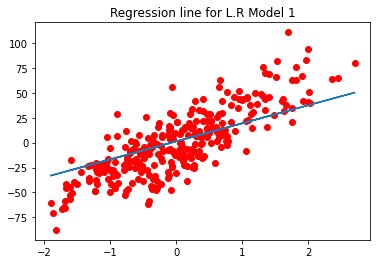

In [16]:
plt.scatter(X_test, y_test, color= 'r')
plt.plot(X_test, Predicted_values)
plt.title('Regression line for L.R Model 1')